To perform a one-way ANOVA on the Abalone dataset to determine if there are statistically significant differences in abalone age among the gender categories, we are loading & preprocessing the data. 

Data Exploration:
  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
1   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
2   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
3   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   
4   I   0.425     0.300   0.095        0.3515          0.1410          0.0775   

   Shell_weight  Rings  
0         0.070      7  
1         0.210      9  
2         0.155     10  
3         0.055      7  
4         0.120      8  

Summary Statistics:
            Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4176.000000  4176.000000  4176.000000   4176.000000      4176.00000   
mean      0.524009     0.407892     0.139527      0.828818         0.35940   
std       0.120103     0.099250     0.041826      0.490424         0.22198   
min       0.

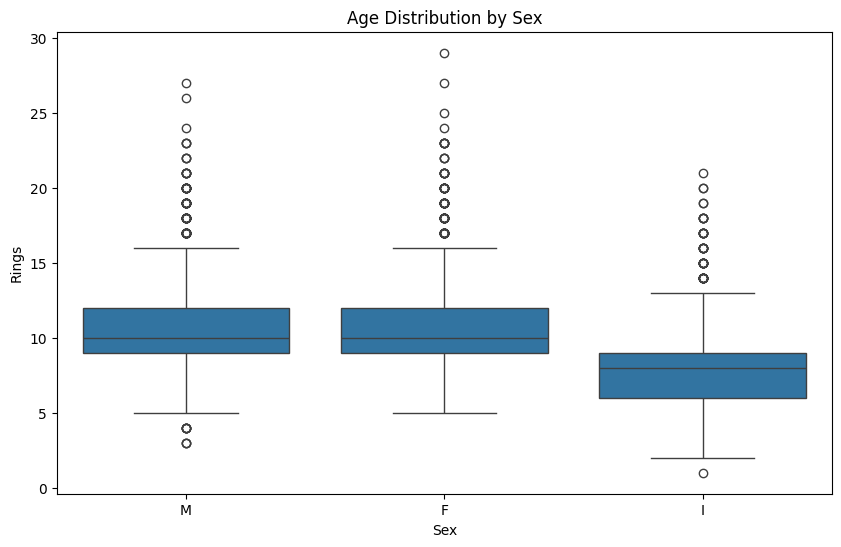


One-way ANOVA Results:
F-statistic: 499.05
P-value: 0.0000
There is a statistically significant difference in abalone age among sex categories.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Load the Abalone dataset (replace 'abalone.csv' with the actual file path)
df = pd.read_csv('abalone.data')

# Adding column names to the respective columns
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
                'Viscera_weight', 'Shell_weight', 'Rings']

# Data Preprocessing
# Let's start by exploring the dataset and understanding its structure
print("Data Exploration:")
print(df.head())  # Display the first few rows

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Data Visualization
# Visualize the distribution of rings (age approximation) by sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Rings', data=df)
plt.title('Age Distribution by Sex')
plt.show()

# One-way ANOVA
# Perform the one-way ANOVA to test for differences in age among sex categories
sex_groups = [group['Rings'] for name, group in df.groupby('Sex')]
f_statistic, p_value = f_oneway(*sex_groups)

# Interpret the ANOVA results
print("\nOne-way ANOVA Results:")
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Determine significance based on p-value
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in abalone age among sex categories.")
else:
    print("There is no statistically significant difference in abalone age among sex categories.")



To conduct a linear regression analysis on the Abalone dataset, we'll use the 'Rings' column as the dependent variable to predict abalone age based on the physical characteristics

In [7]:
import pandas as pd
import statsmodels.api as sm

# Load the Abalone dataset (replace 'abalone.csv' with the actual file path)
df = pd.read_csv('abalone.data')

# Adding column names to the respective columns
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
              'Viscera_weight', 'Shell_weight', 'Rings']

# Data Preprocessing
# Create dummy variables for the 'Sex' column without dropping the first category
df = pd.get_dummies(df, columns=['Sex'], drop_first=False)

# Define the independent variables (predictors) and the dependent variable
X = df[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Sex_F', 'Sex_I', 'Sex_M']]
y = df['Rings']

# Add a constant for the intercept term
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y.astype(float), X.astype(float)).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     539.9
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:12:50   Log-Likelihood:                -9198.9
No. Observations:                4176   AIC:                         1.842e+04
Df Residuals:                    4166   BIC:                         1.848e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7245      0.207     13.

R-squared: The R-squared value of 0.538 indicates that the model explains approximately 53.8% of the variance in the dependent variable (Rings), which suggests a moderate fit.
F-statistic: The F-statistic of 539.9 with a low p-value (0.00) indicates that the overall model is statistically significant.
Coefficients: The coefficients represent the relationship between each independent variable and the dependent variable. For example, the 'Diameter' variable has a coefficient of approximately 10.9903. This means that a one-unit increase in 'Diameter' results in an approximately 10.99-unit increase in 'Rings,' holding other variables constant.
P-values: The p-values associated with each coefficient indicate the statistical significance of each independent variable. For instance, the 'Sex_M' variable has a high p-value (0.515), suggesting that it is not statistically significant in predicting 'Rings.'
Adjusted R-squared: The adjusted R-squared value (0.537) takes into account the number of predictors and is slightly lower than the R-squared value, which is expected when adding more predictors to the model.
Standard Errors: These represent the standard deviation of the sampling distribution of the coefficients.
T-statistics: The t-statistics measure the number of standard errors the coefficient is away from zero.
Confidence Intervals: The confidence intervals show the range within which the true population parameters are likely to fall.
In summary, this regression model suggests that variables like 'Diameter,' 'Height,' 'Whole_weight,' 'Shucked_weight,' and 'Viscera_weight' have a significant impact on predicting the number of 'Rings' (which can be used to approximate abalone age). The 'Sex_M' variable, however, does not seem to be statistically significant.